In [30]:
%matplotlib inline
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
all_train = pd.read_csv('train.csv')
relevant_features_x = all_train[[
    'MSSubClass',
    'MSZoning',
    'LotArea',
    'Utilities',
    'Neighborhood',
    'BldgType',
    'HouseStyle',
    'OverallQual',
    'OverallCond',
    'SalePrice']]

In [32]:
fx = relevant_features_x[[
    'LotArea',
]]
fy = relevant_features_x[['SalePrice']]

q1 = fx.quantile(0.25)[0]
q3 = fx.quantile(0.75)[0]
iqr = q3 - q1
lot_area_bottom_outliers = q1 - 1.5 * iqr
lot_area_top_outliers = q3 + 1.5 * iqr
indices_to_keep = fx[((fx['LotArea'] > lot_area_bottom_outliers) & (fx['LotArea'] < lot_area_top_outliers))].index
fx = fx[fx.index.isin(indices_to_keep)]
fy = fy[fy.index.isin(indices_to_keep)]

X = fx.values
m,n = X.shape
Y = fy.values
x = X.T / 10000
y = Y.T / 10000

In [33]:
def mse(yhat, y, m):
    diff = y - yhat
    return np.sum(diff ** 2) / m

def predict(x, w, b):
    return np.matmul(w, x) + b

In [46]:
w = np.zeros((1,n))
b = 0
alpha = 0.0001

for i in range(1000000):
    yhat = predict(x, w, b)
    cost = mse(y, yhat, m)
    
    dw1 = -2 * np.sum(np.multiply((y - yhat), x)) / m
    db  = -2 * np.sum(y-yhat) / m
    
    w = w - (alpha * dw1)
    b = b - (alpha * db)
    if i % 100000 == 0:
        print('Iteration %s' % i)
        print('yhat %s' % yhat)
        print('cost %s' % cost)
        print('dw1 %s' % dw1)
        print('db %s' % db)

        print('w %s' % w)
        print('b %s' % b)
        print()
print('Iteration %s' % i)
print('yhat %s' % yhat)
print('cost %s' % cost)
print('dw1 %s' % dw1)
print('db %s' % db)

print('w %s' % w)
print('b %s' % b)
print()

Iteration 0
yhat [[0. 0. 0. ... 0. 0. 0.]]
cost 374.7301317801654
dw1 -35.11984842657082
db -35.62725851905104
w [[0.00351198]]
b 0.0035627258519051043

Iteration 100000
yhat [[17.02190123 18.15479659 19.78025516 ... 17.60509606 18.27005638
  18.48678419]]
cost 46.781935002247714
dw1 -0.03792053359225787
db 0.037149814930939135
w [[9.85126784]]
b 8.697579388242403

Iteration 200000
yhat [[16.99054622 18.15021578 19.81408948 ... 17.58752394 18.26819955
  18.49004938]]
cost 46.77031719361922
dw1 -0.013004578261988907
db 0.012740265758915003
w [[10.08408437]]
b 8.469494754881493

Iteration 300000
yhat [[16.97979325 18.14864482 19.82569273 ... 17.58149771 18.26756276
  18.49116915]]
cost 46.768950824985005
dw1 -0.004459827954693787
db 0.004369183854910468
w [[10.16392715]]
b 8.391274746250277

Iteration 400000
yhat [[16.97610559 18.14810607 19.82967198 ... 17.57943106 18.26734438
  18.49155317]]
cost 46.76879012658617
dw1 -0.001529466391342653
db 0.0014983806397114111
w [[10.19130867]]
b 8

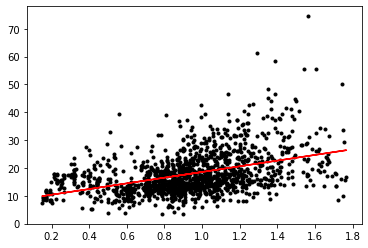

In [47]:
# plt.plot(a, b, 'o', color='black');
x1 = x[0]
y1 = y[0]

# Plot the best fit line over the actual values
slope = w[0,0]
intercept = b
plt.plot(x1,y1,'.', color='black')
plt.plot(x1, slope*x1 + intercept, linestyle='-', color='red')

plt.show()